<a href="https://colab.research.google.com/github/Anoognyareddy06/NLP-Assignments/blob/main/2403A52244_Ass_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load tweet data**

In [ ]:
import pandas as pd
tweets_df = pd.read_csv('/content/Tweets.csv')
print(tweets_df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

Extract first 5 rows

In [ ]:
tweets = tweets_df['text']
print("Extracted tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")


Extracted tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it


Check for the Hashtags

In [ ]:
import re

# Define a function to extract hashtags directly from a string using regex
def extract_actual_hashtags(text):
    return re.findall(r'#\w+', text)

# Apply this function to the cleaned_tweets Series to get actual hashtags
extracted_hashtags = tweets.apply(extract_actual_hashtags)

# Print the first 5 entries of the corrected extracted_hashtags Series
print("Corrected extracted hashtags from preprocessed tweets (first 5):")
for i, hashtags in enumerate(extracted_hashtags.head()):
    print(f"{i+1}. {hashtags}")
from collections import Counter

# Flatten the Series of lists into a single list of all hashtags
all_hashtags = [hashtag for sublist in extracted_hashtags for hashtag in sublist]

# Use Counter to determine the frequency of each unique hashtag
hashtag_frequencies = Counter(all_hashtags)

# Print the top 10 most common hashtags and their counts
print("Top 10 most common hashtags:")
for hashtag, count in hashtag_frequencies.most_common(10):
    print(f"- {hashtag}: {count}")


Corrected extracted hashtags from preprocessed tweets (first 5):
1. []
2. []
3. []
4. []
5. []
Top 10 most common hashtags:
- #DestinationDragons: 75
- #fail: 53
- #jetblue: 35
- #UnitedAirlines: 35
- #customerservice: 33
- #usairwaysfail: 26
- #disappointed: 22
- #avgeek: 19
- #badservice: 19
- #neveragain: 17


Visualization of Hashtags

/tmp/ipython-input-198948009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtags, y=counts, palette='viridis')


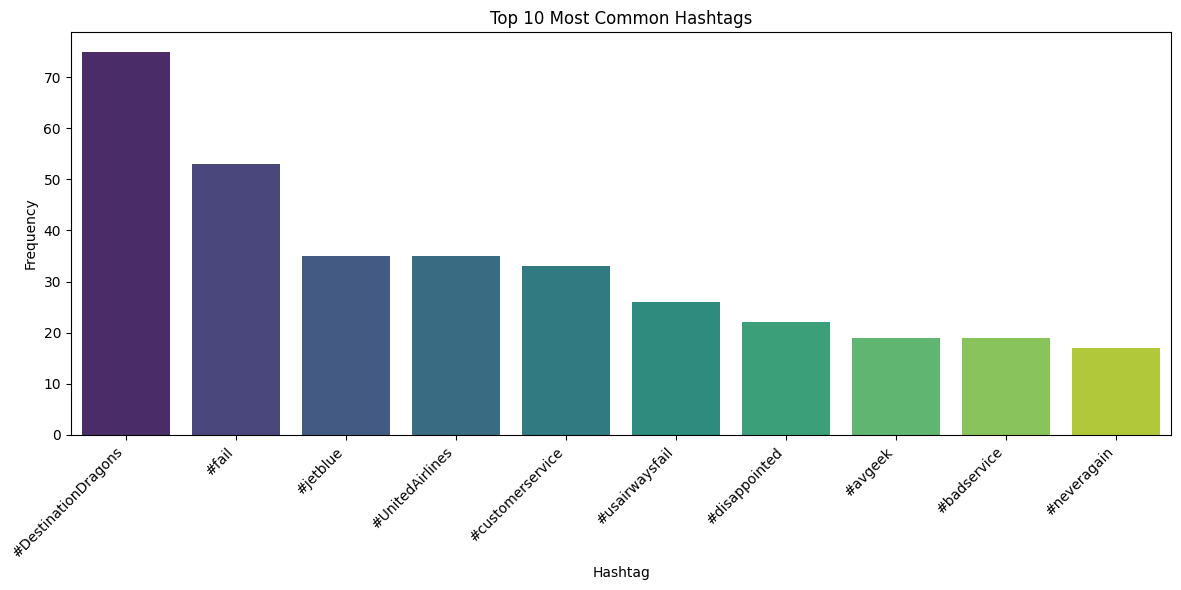

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most common hashtags from the Counter object
top_10_hashtags = hashtag_frequencies.most_common(10)

# Separate hashtags and their counts for plotting
hashtags = [item[0] for item in top_10_hashtags]
counts = [item[1] for item in top_10_hashtags]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtags, y=counts, palette='viridis')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Cleaning the data

In [11]:
import re

def clean_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters and numbers, keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

cleaned_tweets = tweets.apply(clean_text)

print("Original tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nCleaned tweets (first 5):")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

Original tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Cleaned tweets (first 5):
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it


Word Tokenization (spacy)

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization to the cleaned_tweets Series
tokenized_tweets = cleaned_tweets.apply(tokenize_text)

# Display the original cleaned tweet and its tokens for the first 5 entries
print("Tokenized Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Tokens {i+1}:       {tokenized_tweets.iloc[i]}")
    print("-" * 30)


Tokenized Tweets (first 5):
Cleaned Tweet 1: what  said
Tokens 1:       ['what', ' ', 'said']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Tokens 2:       ['plus', 'you', 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Tokens 3:       ['i', 'did', 'nt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Tokens 4:       ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Tokens 5:       ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
----

Word Tokenization (nltk)

In [18]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

tokenized_tweets = cleaned_tweets.apply(tokenize_text)

print("Cleaned tweets (first 5):")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nTokenized tweets (first 5):")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned tweets (first 5):
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it

Tokenized tweets (first 5):
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


Stop Words(spacy)

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to remove stopwords, punctuation, and space tokens using spaCy
def remove_stopwords_and_spaces(text):
    doc = nlp(text)
    # Filter out stopwords, punctuation, and spaces, and convert to lowercase lemma
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]
    return filtered_tokens

# Apply the function to the cleaned_tweets Series
# (Assuming 'cleaned_tweets' is available from a previous step)
tokenized_no_stopwords = cleaned_tweets.apply(remove_stopwords_and_spaces)

# Display the original cleaned tweet and its processed tokens for the first 5 entries
print("Tokens after removing stopwords, punctuation, and spaces (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print("-" * 30)

Tokens after removing stopwords, punctuation, and spaces (first 5):
Cleaned Tweet 1: what  said
Processed Tokens 1: ['say']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Processed Tokens 2: ['plus', 've', 'add', 'commercial', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Processed Tokens 3: ['not', 'today', 'mean', 'need', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Processed Tokens 4: ['aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Processed Tokens 5: ['big', 'bad', 'thing']
------------------------------


Stop words (nltk)

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

filtered_tweets = tokenized_tweets.apply(remove_stopwords)

print("Tokenized tweets (first 5):")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\nFiltered tweets (first 5) (stopwords removed):")
for i, tokens in enumerate(filtered_tweets.head()):
    print(f"{i+1}. {tokens}")

Tokenized tweets (first 5):
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']

Filtered tweets (first 5) (stopwords removed):
1. ['said']
2. ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lemmatization (nltk)

In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

lemmatized_tweets = tokenized_tweets.apply(lemmatize_tokens)

print("Tokenized tweets (first 5):")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\nLemmatized tweets (first 5):")
for i, tokens in enumerate(lemmatized_tweets.head()):
    print(f"{i+1}. {tokens}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Tokenized tweets (first 5):
1. ['what', ' ', 'said']
2. ['plus', 'you', 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'did', 'nt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']

Lemmatized tweets (first 5):
1. ['what', ' ', 'said']
2. ['plus', 'you', 've', 'added', 'commercial', 'to', 'the', 'experience', 'tacky']
3. ['i', 'did', 'nt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guest', 'face', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'it', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


Rejoin (using nltk)

In [14]:
def join_tokens(tokens):
    return ' '.join(tokens)

preprocessed_tweets = lemmatized_tweets.apply(join_tokens)

print("Preprocessed tweets (first 5):")
for i, tweet in enumerate(preprocessed_tweets.head()):
    print(f"{i+1}. {tweet}")

Preprocessed tweets (first 5):
1. what   said
2. plus you ve added commercial to the experience tacky
3. i did nt today must mean i need to take another trip
4. it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse
5. and it a really big bad thing about it


Rejoin (using spacy)

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to perform PoS tagging using spaCy
def pos_tagging_spacy(text):
    doc = nlp(text)
    # Return a list of tuples: (token, PoS_tag)
    return [(token.text, token.pos_) for token in doc]

# Apply the PoS tagging function to the preprocessed_tweets Series
pos_tagged_tweets = preprocessed_tweets.apply(pos_tagging_spacy)

# Display the rejoined tweet and its PoS tags for the first 5 entries
print("PoS Tagging Results (first 5):")
for i in range(5):
    print(f"Rejoined Text {i+1}: {preprocessed_tweets.iloc[i]}")
    print(f"PoS Tags {i+1}:    {pos_tagged_tweets.iloc[i]}")
    print("-" * 30)

PoS Tagging Results (first 5):
Rejoined Text 1: what   said
PoS Tags 1:    [('what', 'PRON'), ('  ', 'SPACE'), ('said', 'VERB')]
------------------------------
Rejoined Text 2: plus you ve added commercial to the experience tacky
PoS Tags 2:    [('plus', 'CCONJ'), ('you', 'PRON'), ('ve', 'AUX'), ('added', 'VERB'), ('commercial', 'ADJ'), ('to', 'ADP'), ('the', 'DET'), ('experience', 'NOUN'), ('tacky', 'ADV')]
------------------------------
Rejoined Text 3: i did nt today must mean i need to take another trip
PoS Tags 3:    [('i', 'PRON'), ('did', 'AUX'), ('nt', 'PART'), ('today', 'NOUN'), ('must', 'AUX'), ('mean', 'VERB'), ('i', 'PRON'), ('need', 'VERB'), ('to', 'PART'), ('take', 'VERB'), ('another', 'DET'), ('trip', 'NOUN')]
------------------------------
Rejoined Text 4: it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse
PoS Tags 4:    [('it', 'PRON'), ('really', 'ADV'), ('aggressive', 'ADJ'), ('to', 'PART'), ('blast', 'VERB'), ('obn

Pipeline(spacy)

In [4]:
import re
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

# Ensure tweets_df and tweets are defined
tweets_df = pd.read_csv('/content/Tweets.csv')
tweets = tweets_df['text']

def preprocess_text_spacy(text):
    # 1. Regex cleaning for mentions and URLs
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text) # Remove URLs

    # 2. Convert the resulting text to lowercase
    text = text.lower()

    # 3. Process the cleaned text using the loaded spaCy model
    doc = nlp(text)

    # 4. Iterate through each token and apply filtering and lemmatization
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]

    # 5. Join the lemmas back into a single string
    return ' '.join(filtered_tokens)

# Apply the function to the original 'tweets' Series to demonstrate
preprocessed_tweets_combined = tweets.apply(preprocess_text_spacy)

# Display the original tweet and the fully preprocessed text for the first 5 entries
print("Original Tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFully Preprocessed Tweets (first 5):")
for i, preprocessed_text in enumerate(preprocessed_tweets_combined.head()):
    print(f"{i+1}. {preprocessed_text}")

Original Tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Fully Preprocessed Tweets (first 5):
1. say
2. plus add commercial experience tacky
3. today mean need trip
4. aggressive blast obnoxious entertainment guest face amp little recourse
5. big bad thing


pipleline using nltk

In [20]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Ensure tweets_df and tweets are defined
tweets_df = pd.read_csv('/content/Tweets.csv')
tweets = tweets_df['text']

# Initialize NLTK resources
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_nltk(text):
    # 1. Regex cleaning for mentions and URLs
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text) # Remove URLs

    # 2. Convert the resulting text to lowercase
    text = text.lower()

    # 3. Tokenize using NLTK
    tokens = word_tokenize(text)

    # 4. Filter out stopwords, punctuation, and perform lemmatization
    filtered_tokens = []
    for word in tokens:
        # Filter out non-alphabetic tokens and stopwords
        if word.isalpha() and word not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(word)
            filtered_tokens.append(lemmatized_word)

    # 5. Join the lemmas back into a single string
    return ' '.join(filtered_tokens)

# Apply the function to the original 'tweets' Series
preprocessed_tweets_combined_nltk = tweets.apply(preprocess_text_nltk)

# Display the original tweet and the fully preprocessed text for the first 5 entries
print("Original Tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFully Preprocessed Tweets (NLTK, first 5):")
for i, preprocessed_text in enumerate(preprocessed_tweets_combined_nltk.head()):
    print(f"{i+1}. {preprocessed_text}")

Original Tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Fully Preprocessed Tweets (NLTK, first 5):
1. said
2. plus added commercial experience tacky
3. today must mean need take another trip
4. really aggressive blast obnoxious entertainment guest face amp little recourse
5. really big bad thing


In [6]:
sentiment_data = pd.DataFrame({
    'processed_text': preprocessed_tweets_combined,
    'sentiment': tweets_df['airline_sentiment']
})

print("DataFrame with Processed Text and Sentiment (first 5 rows):")
display(sentiment_data.head())

DataFrame with Processed Text and Sentiment (first 5 rows):


,processed_text,sentiment
0,say,neutral
1,plus add commercial experience tacky,positive
2,today mean need trip,neutral
3,aggressive blast obnoxious entertainment guest...,negative
4,big bad thing,negative
